In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pymc3 as pm
from scipy.stats import multivariate_normal

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./data/train.csv')
data.describe()

,Id,0,1,2,3,4,5,6,7,8,...,91,92,93,94,95,96,97,98,99,Category
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,...,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,157.000000,0.140018,0.116428,0.147523,0.166251,0.159290,0.154911,0.171788,0.163420,0.172034,...,0.563733,0.576017,0.572355,0.580488,0.599886,0.639733,0.631687,0.633445,0.670396,0.346667
std,21.794495,0.531072,0.533557,0.515018,0.513822,0.506893,0.501646,0.484376,0.499714,0.497433,...,0.742961,0.740551,0.764901,0.733439,0.786804,0.754772,0.783581,0.783238,0.775564,0.479113
min,120.000000,-1.044003,-0.994305,-0.885585,-0.761513,-0.717464,-0.757696,-0.578701,-0.647595,-0.474244,...,-0.218118,-0.130778,-0.242646,-0.238697,-0.183577,-0.199834,-0.194937,-0.300764,-0.150227,0.000000
25%,138.500000,-0.102221,-0.094447,-0.071158,-0.059394,-0.101118,-0.092047,-0.081801,-0.059817,-0.075092,...,0.027346,0.048706,0.028304,0.036863,0.017775,0.057197,0.025564,0.066313,0.064214,0.000000
50%,157.000000,0.051074,0.038222,0.050688,0.068801,0.057736,0.024308,0.044768,0.015566,0.001266,...,0.231157,0.202431,0.208260,0.193447,0.213291,0.220146,0.176925,0.207900,0.247912,0.000000
75%,175.500000,0.244199,0.212144,0.250240,0.215488,0.184486,0.189067,0.149534,0.138871,0.132242,...,0.790795,0.870270,0.924093,0.946616,1.148687,1.114469,1.114301,1.151813,1.212613,1.000000
max,194.000000,1.159202,1.139233,1.249389,1.217042,1.243997,1.208698,1.294389,1.222726,1.351073,...,2.098946,2.051068,2.155725,2.075734,2.084094,2.101399,2.219500,2.115519,2.118771,1.000000


In [3]:
data.head(10)

,Id,0,1,2,3,4,5,6,7,8,...,91,92,93,94,95,96,97,98,99,Category
0,120,0.147298,-0.142030,0.091737,-0.151707,0.060124,0.186191,-0.021298,-0.025636,0.061044,...,-0.218118,0.011316,0.079464,-0.010833,-0.053485,0.046450,-0.008333,0.168574,0.123273,0
1,121,0.115710,0.105061,0.038446,0.166711,-0.113913,0.004528,-0.006954,-0.140054,0.154231,...,0.021526,0.069009,-0.060343,0.094007,0.049558,0.112370,0.020398,0.039687,0.217384,0
2,122,-0.548826,-0.466551,-0.650890,-0.553450,-0.449101,-0.496902,-0.464860,-0.394458,-0.271801,...,0.057272,0.088062,-0.069730,0.168498,0.109672,0.202808,-0.019942,0.058902,0.053936,0
3,123,0.192618,0.291155,-0.042980,0.146483,0.015390,0.019394,-0.005577,-0.048682,0.025772,...,0.140831,0.257332,0.262786,0.351659,0.213291,0.251077,0.190920,0.251743,0.337730,1
4,124,0.075706,0.069045,-0.019818,0.068801,-0.226501,0.011658,0.087905,-0.080787,-0.080369,...,0.434803,0.322841,0.297772,0.461421,0.406143,0.562082,0.554588,0.471489,0.384229,1
5,125,1.081769,0.986722,1.067524,1.140523,0.975286,1.074729,0.871820,1.140957,1.276274,...,2.098946,1.882913,1.979897,1.852567,2.043995,2.059601,2.219500,2.038103,2.072409,1
6,126,0.212677,0.271821,0.052499,0.353935,0.177247,0.165208,0.077037,0.054077,0.001218,...,0.880501,0.894316,0.776692,0.910526,1.145064,1.302965,1.182394,1.286594,1.184424,1
7,127,-1.044003,-0.994305,-0.885585,-0.678902,-0.717464,-0.513387,-0.501884,-0.647595,-0.336069,...,0.607999,0.508485,0.442513,0.644257,0.838618,0.936488,0.929766,0.965134,1.024578,1
8,128,0.984083,0.938459,0.956299,0.922269,1.078399,1.107597,0.983515,1.222726,1.049279,...,1.937170,1.951902,2.069157,2.075734,1.953834,1.922141,1.913410,1.965790,1.956595,0
9,129,-0.056781,0.053274,0.033048,0.010449,0.101132,-0.055987,-0.045404,0.012941,-0.047868,...,0.231157,0.182868,0.240331,0.156288,0.218797,0.042883,0.127180,0.130278,0.162561,0


In [4]:
data.shape

(75, 102)

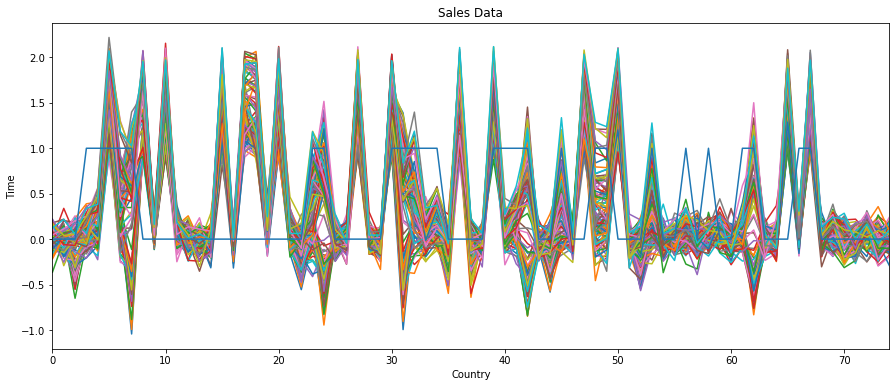

In [5]:
ax = data.loc[:, data.columns != 'Id'].plot(figsize = (15,6), title="Sales Data", legend = False)
ax.set(xlabel="Country", ylabel="Time")
plt.show()

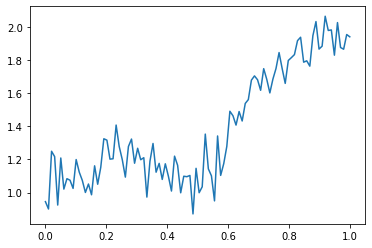

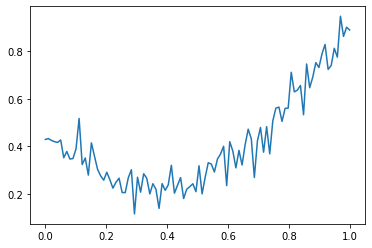

In [6]:
X = np.linspace(0,1,100)[:,None]
Y = data.iloc[18,1:101].values[:,None]
plt.plot(X, Y)
plt.show()

X = np.linspace(0,1,100)
Y =  X/2-2*np.exp(-(X-0.5)**2) + 2 + np.random.randn(len(X))*0.05
X = X[:,None]
Y = Y[:, None]
plt.plot(X,Y)
plt.show()

In [7]:
with pm.Model() as model:
    #  periodic component x 
    η_per = pm.HalfCauchy("η_per", beta=2, testval=1.0)
    period  = pm.Normal("period", mu=1, sigma=3)
    ℓ_psmooth = pm.Gamma("ℓ_psmooth ", alpha=1, beta=1)
    
    cov_seasonal = η_per**2 * pm.gp.cov.Periodic(1, period, ℓ_psmooth)     
    gp1 = pm.gp.Marginal(cov_func=cov_seasonal)
    
    #  linear component x 
    tau = pm.HalfCauchy("tau", beta=2, testval=1.0)
    c  = pm.Normal("c", mu=0, sigma=1) 
    
    cov_linear = tau * pm.gp.cov.Linear(1, c)     
    gp2 = pm.gp.Marginal(cov_func=cov_linear)

    # gp represents f1 + f2.
    gp = gp1 + gp2

    # noise model
    sigma = pm.HalfCauchy("sigma", beta=5, testval=0.1)
    f = gp.marginal_likelihood("f", X, Y[:,0], noise=sigma)
    
    # this line calls an optimizer to optimize the marginal likelihood
    mp = pm.find_MAP(include_transformed=True)

logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 520.64it/s]   


In [8]:
#optimized parameters
sorted([name+":"+str(mp[name]) for name in mp.keys() if not name.endswith("_")])

['c:-0.38234518086243835',
 'period:3.0270750078274564',
 'sigma:0.053768963714671006',
 'tau:0.2268456397332753',
 'η_per:0.6198470777211973',
 'ℓ_psmooth :0.7704099333163671']

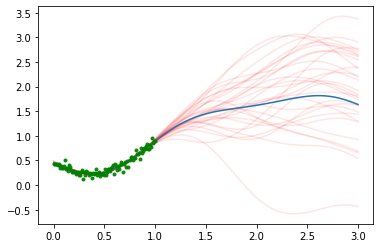

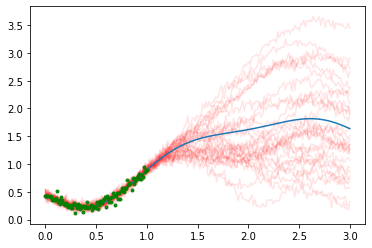

In [9]:
# 200 new values from x=0 to x=3
n_new = 200
X_new = np.linspace(0, 3, n_new)[:,None]

#periodic term
f1_pred = gp1.predict(X_new, point=mp, given={"gp": gp, "X": X, "y": Y[:,0], "noise": sigma})
y1_pred = gp1.predict(X_new, point=mp, given={"gp": gp, "X": X, "y": Y[:,0], "noise": sigma}, pred_noise=True)
#linear term
f2_pred = gp2.predict(X_new, point=mp, given={"gp": gp, "X": X, "y": Y[:,0], "noise": sigma})
y2_pred = gp2.predict(X_new, point=mp, given={"gp": gp, "X": X, "y": Y[:,0], "noise": sigma}, pred_noise=True)
#sum of periodic and linear term
y_pred  = gp.predict(X_new, point=mp, given={"gp": gp, "X": X, "y": Y[:,0], "noise": sigma}, pred_noise=True)
f_pred  = gp.predict(X_new, point=mp, given={"gp": gp, "X": X, "y": Y[:,0], "noise": sigma})


#we sample 10 regression lines from the posterior
sample_f = multivariate_normal(f_pred[0],f_pred[1]).rvs(30)

plt.plot(X_new[:,0],sample_f.T,color='red',alpha=0.1)# regression lines
plt.plot(X_new[:,0],f_pred[0])# this is the average line
plt.plot(X, Y, 'og', ms=3, alpha=0.9, label="Observed data", Zorder=1000);

plt.figure()
#we sample 10 regression lines from the posterior
sample_y = multivariate_normal(y_pred[0],y_pred[1]).rvs(30)

plt.plot(X_new[:,0],sample_y.T,color='red',alpha=0.1)# regression lines
plt.plot(X_new[:,0],f_pred[0])# this is the average line
plt.plot(X, Y, 'og', ms=3, alpha=0.9, label="Observed data", Zorder=1000);

def are_sales_increasing(pred):
    posterior_probability_deriviative_is_positive = len(np.where(np.gradient(pred[0],X_new[:,0])>0)[0])/len(pred[0])
    print("probability that the function is increasing=", posterior_probability_deriviative_is_positive)
    if posterior_probability_deriviative_is_positive>0.8:
        return 1
    else:
        return 0

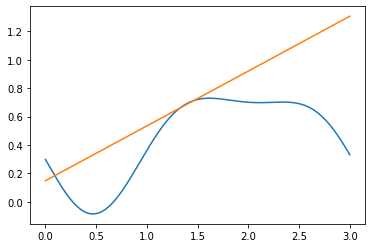

In [10]:
#we can recover the single components
plt.plot(X_new[:,0],f1_pred[0])
plt.plot(X_new[:,0],f2_pred[0])

In [12]:
def run_model(x, y, plot=False):
    with pm.Model() as model:
        #  periodic component x 
        η_per = pm.HalfCauchy("η_per", beta=2, testval=1.0)
        period  = pm.Normal("period", mu=1, sigma=3)
        ℓ_psmooth = pm.Gamma("ℓ_psmooth ", alpha=1, beta=1)

        cov_seasonal = η_per**2 * pm.gp.cov.Periodic(1, period, ℓ_psmooth)     
        gp1 = pm.gp.Marginal(cov_func=cov_seasonal)

        #  linear component x 
        tau = pm.HalfCauchy("tau", beta=2, testval=1.0)
        c  = pm.Normal("c", mu=0, sigma=1) 

        cov_linear = tau * pm.gp.cov.Linear(1, c)     
        gp2 = pm.gp.Marginal(cov_func=cov_linear)

        # gp represents f1 + f2.
        gp = gp1 + gp2

        # noise model
        sigma = pm.HalfCauchy("sigma", beta=5, testval=0.1)
        f = gp.marginal_likelihood("f", X, Y[:,0], noise=sigma)

        # this line calls an optimizer to optimize the marginal likelihood
        mp = pm.find_MAP(include_transformed=True)
        
    # 200 new values from x=0 to x=3
    n_new = 200
    X_new = np.linspace(0, 3, n_new)[:,None]

    #periodic term
    f1_pred = gp1.predict(X_new, point=mp, given={"gp": gp, "X": X, "y": Y[:,0], "noise": sigma})
    y1_pred = gp1.predict(X_new, point=mp, given={"gp": gp, "X": X, "y": Y[:,0], "noise": sigma}, pred_noise=True)
    #linear term
    f2_pred = gp2.predict(X_new, point=mp, given={"gp": gp, "X": X, "y": Y[:,0], "noise": sigma})
    y2_pred = gp2.predict(X_new, point=mp, given={"gp": gp, "X": X, "y": Y[:,0], "noise": sigma}, pred_noise=True)
    #sum of periodic and linear term
    y_pred  = gp.predict(X_new, point=mp, given={"gp": gp, "X": X, "y": Y[:,0], "noise": sigma}, pred_noise=True)
    f_pred  = gp.predict(X_new, point=mp, given={"gp": gp, "X": X, "y": Y[:,0], "noise": sigma})


    #we sample 10 regression lines from the posterior
    sample_f = multivariate_normal(f_pred[0],f_pred[1]).rvs(30)
    
    if (plot == True):
        plt.plot(X_new[:,0],sample_f.T,color='red',alpha=0.1)# regression lines
        plt.plot(X_new[:,0],f_pred[0])# this is the average line
        plt.plot(X, Y, 'og', ms=3, alpha=0.9, label="Observed data", Zorder=1000);

        plt.figure()
    
    #we sample 10 regression lines from the posterior
    sample_y = multivariate_normal(y_pred[0],y_pred[1]).rvs(30)

    if (plot == True):
        plt.plot(X_new[:,0],sample_y.T,color='red',alpha=0.1)# regression lines
        plt.plot(X_new[:,0],f_pred[0])# this is the average line
        plt.plot(X, Y, 'og', ms=3, alpha=0.9, label="Observed data", Zorder=1000);
    
    pred = f2_pred[0]
    
    posterior_probability_deriviative_is_positive = len(np.where(np.gradient(pred[0],X_new[:,0])>0)[0])/len(pred[0])
    print("probability that the function is increasing=", posterior_probability_deriviative_is_positive)
    if posterior_probability_deriviative_is_positive>0.8:
        return 1
    else:
        return 0

In [13]:
test_df = pd.read_csv('./data/test.csv')
test_df.head()

,Id,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,0,1.050702,1.004361,0.880657,0.959512,1.014129,0.890916,0.986703,1.135940,1.223539,...,1.826883,1.797263,1.872348,1.926992,1.843073,1.958611,1.800846,1.867793,2.056990,2.060379
1,1,-0.042360,-0.134542,-0.093373,0.076402,-0.122659,-0.149690,-0.050888,0.087327,-0.003546,...,0.233283,0.265816,0.218283,0.134600,0.273861,0.056165,0.103871,0.099539,0.305985,0.294278
2,2,0.035063,0.050938,0.067512,0.117029,0.049060,-0.014029,0.079372,0.204120,0.002883,...,-0.005722,0.195326,0.169835,0.255006,0.211215,0.116720,0.162032,0.116356,0.305580,0.202131
3,3,-0.111408,-0.063093,-0.094206,-0.054800,-0.021415,0.083715,-0.032116,-0.158563,0.114007,...,0.074536,0.009352,-0.016270,-0.087119,0.007215,0.073824,-0.114334,0.008747,0.023304,-0.071806
4,4,0.977574,0.989015,1.243740,1.111227,1.288457,1.000790,1.052081,0.937450,0.999783,...,1.907418,1.892012,1.780125,1.899383,1.939521,1.896775,2.038367,2.071734,1.982058,2.023052


In [14]:
x = np.linspace(0,1,100)[:,None]
Decision = pd.DataFrame(columns=['Id','Category'])
for r in range(test_df.shape[0]):
    id_row = test_df.iloc[r,0]
    y = test_df.iloc[r,1:101].values[:,None]
    decision = run_model(x,y)
    Decision = Decision.append({'Id': int(id_row), 'Category': int(decision)}, ignore_index=True) 

Decision.to_csv('submission_1.csv')

logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 536.52it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 549.74it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 540.45it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 526.82it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 551.09it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 505.81it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 549.46it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 546.49it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 524.80it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 539.94it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 513.31it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 525.62it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 547.00it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 506.36it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 506.23it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 458.54it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 464.93it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 373.83it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 547.50it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 543.49it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 565.08it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 546.67it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 566.06it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 549.05it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 534.90it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 544.28it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 539.95it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 533.88it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 550.39it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 553.39it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 570.55it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 530.79it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 562.36it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 551.50it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 557.69it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 559.07it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 577.51it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 554.38it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 541.43it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 573.41it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 546.82it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 566.07it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 581.01it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 553.76it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 550.62it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 545.72it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 492.33it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 494.08it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 547.87it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 570.68it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 542.48it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 535.77it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 489.36it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 501.22it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 539.93it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 591.58it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 592.25it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 583.06it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 581.72it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 560.84it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 610.21it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 494.20it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 375.03it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 569.72it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 382.89it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 557.20it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 535.66it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 559.95it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 390.36it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 534.87it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 532.34it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 557.80it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 512.97it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 534.55it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 554.74it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 537.16it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 593.77it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 612.75it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 560.29it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 611.53it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 531.46it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 534.54it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 538.76it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 565.12it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 557.11it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 543.10it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 519.05it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 568.07it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 545.07it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 615.45it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 534.67it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 589.37it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 590.41it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 508.27it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 544.64it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 540.74it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 550.14it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 533.49it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 543.76it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 537.65it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 551.33it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 537.71it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 571.88it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 549.07it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 560.55it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 509.63it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 611.23it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 550.91it/s]   


probability that the function is increasing= 1.0


logp = 128.89, ||grad|| = 0.13951: 100%|██████████| 40/40 [00:00<00:00, 476.96it/s]   


probability that the function is increasing= 1.0


KeyboardInterrupt: 